In [18]:
import pandas as pd

df = pd.read_csv("final_multimodal_dataset.csv")

print(df.shape)
print(df.columns.tolist())
print(df.head())
print(df.describe())
print(df.isna().sum())


(4116, 43)
['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'Displacement_mm', 'Strain_micro', 'PorePressure_kPa', 'SeismicVibration_mm/s', 'SUBDIVISION_clean', 'latitude_rain', 'longitude_rain', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'latitude', 'longitude', 'dem_latitude', 'dem_longitude', 'dem_elevation', 'dem_slope', 'dem_aspect', 'crack_density', 'debris_entropy', 'debris_contrast', 'debris_homogeneity', 'vegetation_green_ratio']
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR I

In [2]:
import pandas as pd

df = pd.read_csv("final_multimodal_dataset.csv")

# Remove unused / garbage columns
df = df.drop(columns=[c for c in df.columns if "Unnamed" in c], errors="ignore")

df = df.fillna(0)

# ------------------------------------------------------------
# 1) Compute Percentile Thresholds for Balanced Risk Creation
# ------------------------------------------------------------
feat_list = [
    "dem_slope", "ANNUAL", "PorePressure_kPa", "Displacement_mm",
    "crack_density", "debris_entropy", "debris_contrast"
]

percentiles = {feat: {
    "p40": df[feat].quantile(0.40),
    "p75": df[feat].quantile(0.75)
} for feat in feat_list}

print("\n===== PERCENTILE THRESHOLDS USED =====")
for feat in percentiles:
    print(feat, percentiles[feat])

# ------------------------------------------------------------
# 2) Balanced Rockfall Risk Logic
# ------------------------------------------------------------
def compute_balanced_risk(row):
    score = 0

    # Add points for each contributing factor
    if row["dem_slope"] > percentiles["dem_slope"]["p75"]:
        score += 2
    elif row["dem_slope"] > percentiles["dem_slope"]["p40"]:
        score += 1

    if row["ANNUAL"] > percentiles["ANNUAL"]["p75"]:
        score += 2
    elif row["ANNUAL"] > percentiles["ANNUAL"]["p40"]:
        score += 1

    if row["PorePressure_kPa"] > percentiles["PorePressure_kPa"]["p75"]:
        score += 2
    elif row["PorePressure_kPa"] > percentiles["PorePressure_kPa"]["p40"]:
        score += 1

    if row["Displacement_mm"] > percentiles["Displacement_mm"]["p75"]:
        score += 2
    elif row["Displacement_mm"] > percentiles["Displacement_mm"]["p40"]:
        score += 1
    
    if row["crack_density"] > percentiles["crack_density"]["p75"]:
        score += 2
    elif row["crack_density"] > percentiles["crack_density"]["p40"]:
        score += 1

    if row["debris_entropy"] > percentiles["debris_entropy"]["p75"]:
        score += 2
    elif row["debris_entropy"] > percentiles["debris_entropy"]["p40"]:
        score += 1

    if row["debris_contrast"] > percentiles["debris_contrast"]["p75"]:
        score += 2
    elif row["debris_contrast"] > percentiles["debris_contrast"]["p40"]:
        score += 1

    # Final risk classification based on accumulated score
    if score >= 10:
        return 2   # High Risk
    elif score >= 5:
        return 1   # Medium Risk
    else:
        return 0   # Low Risk


df["rockfall_risk"] = df.apply(compute_balanced_risk, axis=1)

# ------------------------------------------------------------
# 3) Show Distribution and Save Dataset
# ------------------------------------------------------------
print("\n===== FINAL BALANCED RISK DISTRIBUTION =====")
print(df["rockfall_risk"].value_counts())

df.to_csv("dataset_balanced_risk_final.csv", index=False)

print("\n✅ Balanced rockfall risk created & dataset saved as dataset_balanced_risk_final.csv")



===== PERCENTILE THRESHOLDS USED =====
dem_slope {'p40': np.float64(83.92378853), 'p75': np.float64(83.92378853)}
ANNUAL {'p40': np.float64(989.1), 'p75': np.float64(1635.1000000000001)}
PorePressure_kPa {'p40': np.float64(49.94521344), 'p75': np.float64(85.68484271)}
Displacement_mm {'p40': np.float64(9.971625002), 'p75': np.float64(17.0935370425)}
crack_density {'p40': np.float64(0.02094375), 'p75': np.float64(0.0420052085)}
debris_entropy {'p40': np.float64(2.269123802), 'p75': np.float64(5.579467720249999)}
debris_contrast {'p40': np.float64(142.2919266), 'p75': np.float64(656.8878169)}

===== FINAL BALANCED RISK DISTRIBUTION =====
rockfall_risk
1    1942
0    1870
2     304
Name: count, dtype: int64

✅ Balanced rockfall risk created & dataset saved as dataset_balanced_risk_final.csv


In [31]:
df.head()

,dem_slope,dem_elevation,dem_aspect,crack_density,debris_entropy,debris_contrast,debris_homogeneity,vegetation_green_ratio,Displacement_mm,Strain_micro,PorePressure_kPa,SeismicVibration_mm/s,ANNUAL,Jun-Sep,Oct-Dec,Mar-May,SEP,MAY,OCT,rockfall_risk
0,72.653935,55,231.340192,0.042742,1.532713,880.219262,0.956968,0.687117,34.725428,346.040789,148.213710,1.671645,3373.2,1696.3,980.3,560.3,332.6,528.8,388.5,1
1,72.653935,55,231.340192,0.020548,5.307968,118.006151,0.246275,0.170235,34.930471,339.854663,170.245158,1.322229,3520.7,2185.9,716.7,458.3,666.2,446.1,197.2,1
2,72.653935,55,231.340192,0.132104,6.572626,926.162633,0.060116,0.173583,30.869377,306.419797,158.431013,1.676174,2957.4,1874.0,690.6,236.1,339.0,235.1,181.2,1
3,72.653935,55,231.340192,0.019873,0.910345,274.059495,0.973798,0.164273,33.842060,333.221564,161.862917,1.834997,3079.6,1977.6,571.0,506.9,820.4,304.5,222.2,1
4,72.653935,55,231.340192,0.020731,3.270416,95.759354,0.633185,0.164219,25.198693,248.948701,137.475772,0.815488,2566.7,1624.9,630.8,309.7,297.0,279.5,260.7,1



🔍 TOP CORRELATED FEATURES WITH ROCKFALL_RISK

rockfall_risk       1.000000
PorePressure_kPa    0.630761
ANNUAL              0.629726
Displacement_mm     0.628857
Strain_micro        0.627692
Jun-Sep             0.565504
JUN                 0.538894
Mar-May             0.466688
JUL                 0.465627
MAY                 0.464152
AUG                 0.456461
SEP                 0.450619
debris_contrast     0.434639
debris_entropy      0.391526
crack_density       0.390868
Name: rockfall_risk, dtype: float64
Dataset Loaded: (4116, 39)

Initial Class Distribution:
 rockfall_risk
1    1942
0    1870
2     304
Name: count, dtype: int64

After SMOTE Balancing:
 rockfall_risk
2    1942
1    1942
0    1942
Name: count, dtype: int64

================ TRAINING: CatBoost ================
CatBoost Accuracy: 0.9906
CatBoost Macro-F1: 0.9906
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       388
           1       0.99      0.98      0.99  

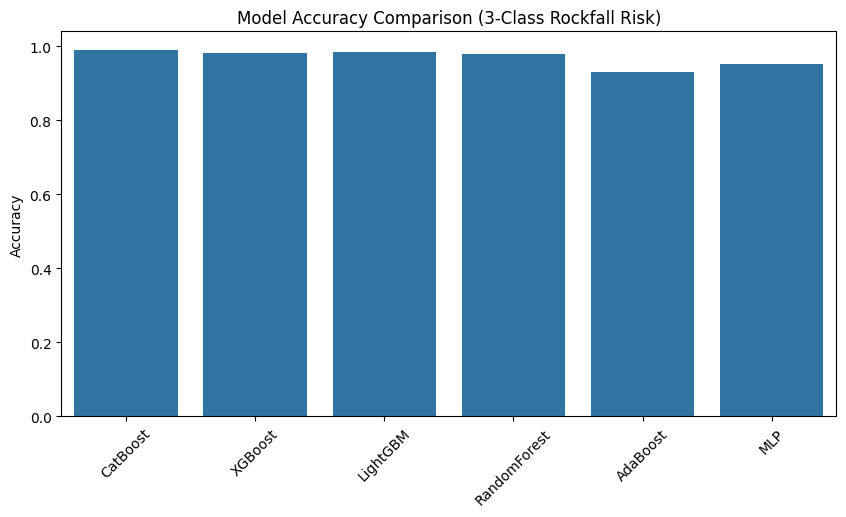


🔥 BEST MODEL SELECTED: CatBoost


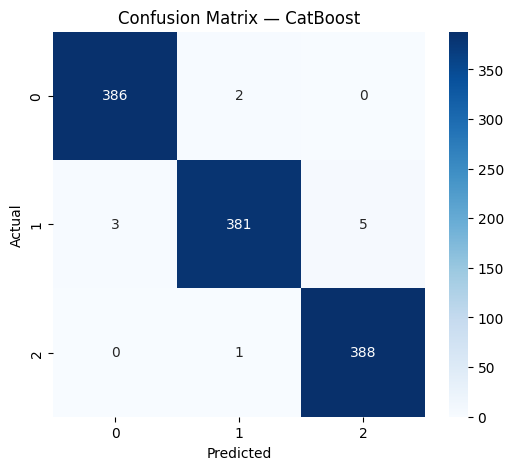


✅ Model saved successfully as final_rockfall_3class_model.pkl

🔍 NEGATIVELY CORRELATED FEATURES

DEC                      0.139428
JAN                      0.089841
YEAR                    -0.002339
SeismicVibration_mm/s   -0.009057
dem_elevation           -0.074433
latitude                -0.115028
latitude_rain           -0.115028
dem_slope               -0.196344
debris_homogeneity      -0.368852
dem_latitude                  NaN
Name: rockfall_risk, dtype: float64


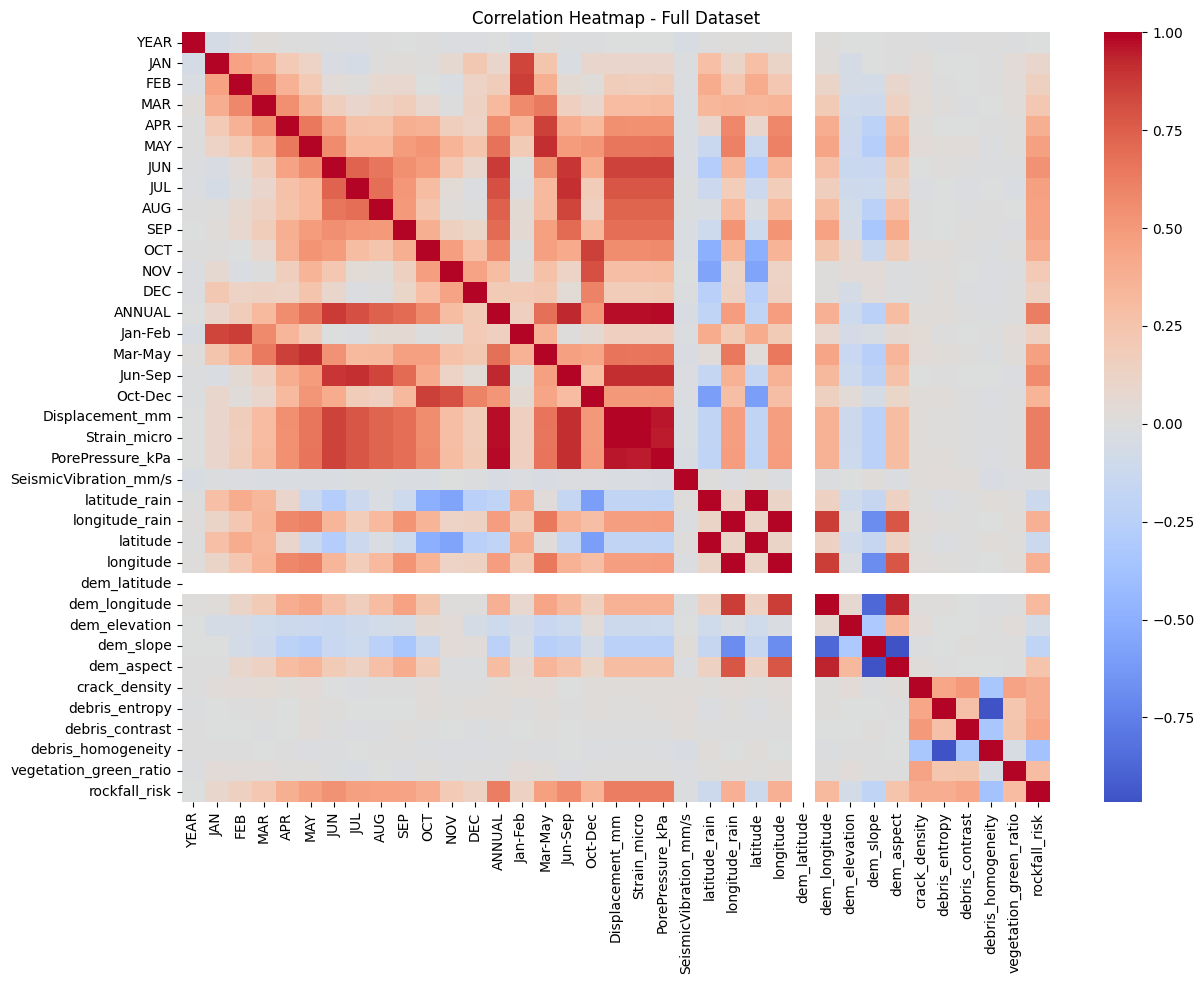

                   Feature  MI_Score
18         Displacement_mm  0.302389
13                  ANNUAL  0.299720
19            Strain_micro  0.277231
20        PorePressure_kPa  0.275864
23          longitude_rain  0.238548
22           latitude_rain  0.237314
25               longitude  0.236417
24                latitude  0.231278
16                 Jun-Sep  0.226536
6                      JUN  0.218359
7                      JUL  0.155608
31           crack_density  0.154781
5                      MAY  0.139351
32          debris_entropy  0.135451
15                 Mar-May  0.127575
8                      AUG  0.122787
9                      SEP  0.120915
34      debris_homogeneity  0.118526
33         debris_contrast  0.117489
10                     OCT  0.095098
4                      APR  0.092930
17                 Oct-Dec  0.081514
28           dem_elevation  0.063956
27           dem_longitude  0.059213
35  vegetation_green_ratio  0.058826
11                     NOV  0.055344
3

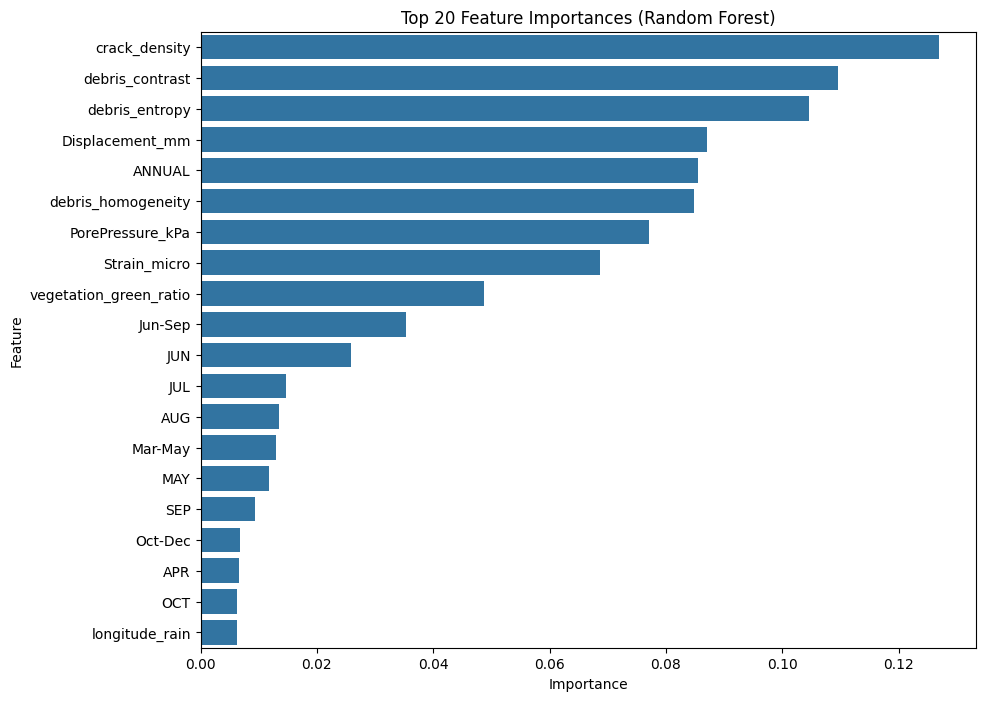

In [3]:
numeric_df = df.select_dtypes(include=['number']).copy()

# ----------------------------------------------------------
# 2. CORRELATION WITH ROCKFALL RISK
# ----------------------------------------------------------
correlations = numeric_df.corr()["rockfall_risk"].sort_values(ascending=False)

print("\n🔍 TOP CORRELATED FEATURES WITH ROCKFALL_RISK\n")
print(correlations.head(15))
# ==============================================================
#   MULTIMODAL ROCKFALL RISK — FINAL 6-MODEL RESEARCH PIPELINE
# ==============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings("ignore")

# --------------------------------------------------------------
# 1. Load Dataset
# --------------------------------------------------------------
df = pd.read_csv("dataset_balanced_risk_final.csv")
print("Dataset Loaded:", df.shape)

# --------------------------------------------------------------
# 2. Select Domain-Validated Features (BEST RESEARCH OPTION)
# --------------------------------------------------------------
selected_features = [
    # Terrain (DEM)
    "dem_slope", "dem_elevation", "dem_aspect",

    # Drone Imagery Structural Indicators
    "crack_density", "debris_entropy", "debris_contrast",
    "debris_homogeneity", "vegetation_green_ratio",

    # Geotechnical Instrumentation
    "Displacement_mm", "Strain_micro",
    "PorePressure_kPa", "SeismicVibration_mm/s",

    # Rainfall Seasonal & Annual Indicators
    "ANNUAL", "Jun-Sep", "Oct-Dec", "Mar-May",
    "SEP", "MAY", "OCT",
]

df = df[selected_features + ["rockfall_risk"]].fillna(0)

# --------------------------------------------------------------
# 3. Split Features and Target
# --------------------------------------------------------------
X = df[selected_features]
y = df["rockfall_risk"]

print("\nInitial Class Distribution:\n", y.value_counts())

# --------------------------------------------------------------
# 4. Apply SMOTE for Multi-Class Balancing
# --------------------------------------------------------------
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

print("\nAfter SMOTE Balancing:\n", y_bal.value_counts())

# --------------------------------------------------------------
# 5. Train/Test Split
# --------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.20, random_state=42, stratify=y_bal
)

# Scaling for MLP only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------------------------
# 6. Define the Six ML Models
# --------------------------------------------------------------
models = {
    "CatBoost": CatBoostClassifier(verbose=0, depth=8, learning_rate=0.05),
    "XGBoost": XGBClassifier(
        eval_metric="mlogloss",
        num_class=3,
        objective="multi:softprob"
    ),
    "LightGBM": LGBMClassifier(objective="multiclass", num_class=3),
    "RandomForest": RandomForestClassifier(n_estimators=400),
    "AdaBoost": AdaBoostClassifier(n_estimators=300),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=800)
}

results_acc = {}
results_f1 = {}

# --------------------------------------------------------------
# 7. Train & Evaluate All 6 Models
# --------------------------------------------------------------
for name, model in models.items():
    print(f"\n================ TRAINING: {name} ================")

    if name == "MLP":
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        probas = model.predict_proba(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        probas = model.predict_proba(X_test)

    acc = accuracy_score(y_test, preds)
    f1_macro = classification_report(y_test, preds, output_dict=True)['macro avg']['f1-score']

    results_acc[name] = acc
    results_f1[name] = f1_macro

    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Macro-F1: {f1_macro:.4f}")
    print(classification_report(y_test, preds))

# --------------------------------------------------------------
# 8. Plot Accuracy Comparison
# --------------------------------------------------------------
plt.figure(figsize=(10,5))
sns.barplot(x=list(results_acc.keys()), y=list(results_acc.values()))
plt.title("Model Accuracy Comparison (3-Class Rockfall Risk)")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# --------------------------------------------------------------
# 9. Confusion Matrix for Best Model (Based on Macro-F1)
# --------------------------------------------------------------
best_model_name = max(results_f1, key=results_f1.get)
best_model = models[best_model_name]

print(f"\n🔥 BEST MODEL SELECTED: {best_model_name}")

if best_model_name == "MLP":
    preds_best = best_model.predict(X_test_scaled)
else:
    preds_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, preds_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------------------------------------------------
# 10. SHAP EXPLAINABILITY (CatBoost Recommended)
# --------------------------------------------------------------
# print("\nGenerating SHAP Explainability...")
# explainer = shap.TreeExplainer(models["CatBoost"])
# shap_values = explainer.shap_values(X_train)
# shap.summary_plot(shap_values, X_train, plot_type="bar")

# --------------------------------------------------------------
# 11. Save Final Best Model
# --------------------------------------------------------------
joblib.dump(best_model, "final_rockfall_3class_model.pkl")
print("\n✅ Model saved successfully as final_rockfall_3class_model.pkl")

print("\n🔍 NEGATIVELY CORRELATED FEATURES\n")
print(correlations.tail(10))

# ----------------------------------------------------------
# 3. CORRELATION HEATMAP
# ----------------------------------------------------------
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - Full Dataset")
plt.show()

# ----------------------------------------------------------
# 4. MUTUAL INFORMATION ANALYSIS
# ----------------------------------------------------------
X = numeric_df.drop(columns=["rockfall_risk"])
y = numeric_df["rockfall_risk"]

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, random_state=42)

mi_df = pd.DataFrame({
    "Feature": X.columns,
    "MI_Score": mi_scores
})

mi_df = mi_df.sort_values(by="MI_Score", ascending=False)
print(mi_df)


# ----------------------------------------------------------
# 5. RANDOM FOREST FEATURE IMPORTANCE
# ----------------------------------------------------------
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X, y)

rf_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n🔍 Random Forest Feature Importance:")
print(rf_importances.head(15))

# ----------------------------------------------------------
# 6. VISUALIZE FEATURE IMPORTANCE (Random Forest)
# ----------------------------------------------------------
plt.figure(figsize=(10, 8))
sns.barplot(x=rf_importances["Importance"].head(20),
            y=rf_importances["Feature"].head(20))
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

In [34]:
df.to_csv("final_processed_dataset.csv", index=False)

Dataset Loaded: (4116, 39)

🔍 TOP CORRELATED FEATURES

rockfall_risk             1.000000
PorePressure_kPa          0.630761
ANNUAL                    0.629726
Displacement_mm           0.628857
Strain_micro              0.627692
Jun-Sep                   0.565504
Mar-May                   0.466688
MAY                       0.464152
SEP                       0.450619
debris_contrast           0.434639
debris_entropy            0.391526
crack_density             0.390868
OCT                       0.389776
Oct-Dec                   0.353943
vegetation_green_ratio    0.304264
Name: rockfall_risk, dtype: float64


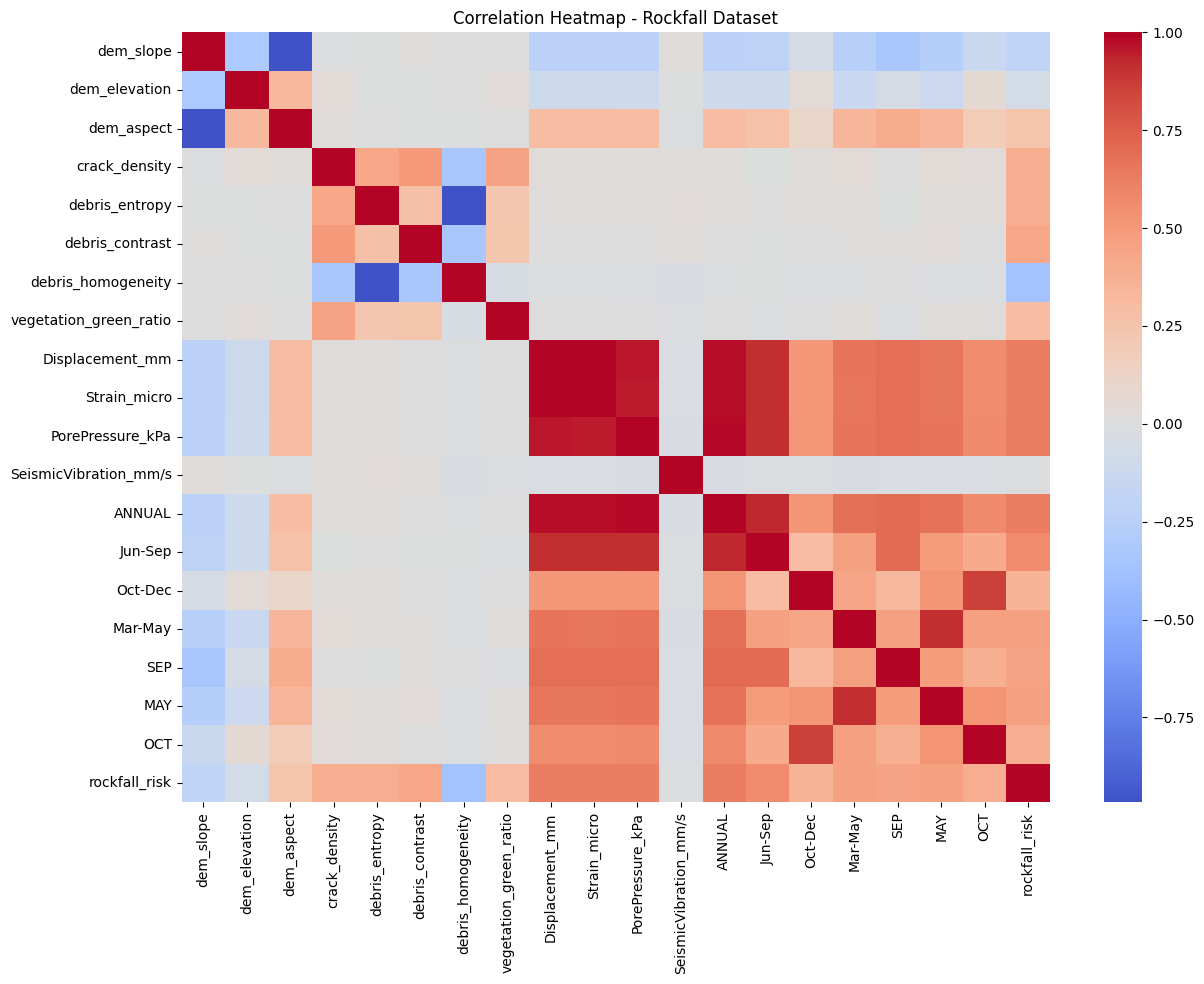


🔍 Mutual Information Scores

                   Feature        MI
8          Displacement_mm  0.302632
12                  ANNUAL  0.300917
9             Strain_micro  0.277493
10        PorePressure_kPa  0.274925
13                 Jun-Sep  0.224489
3            crack_density  0.148815
17                     MAY  0.147908
4           debris_entropy  0.136768
15                 Mar-May  0.127623
6       debris_homogeneity  0.122146
16                     SEP  0.121665
5          debris_contrast  0.116466
18                     OCT  0.090193
14                 Oct-Dec  0.080396
0                dem_slope  0.065451
7   vegetation_green_ratio  0.062001
1            dem_elevation  0.055102
2               dem_aspect  0.051623
11   SeismicVibration_mm/s  0.021097

Initial Class Distribution:
 rockfall_risk
1    1942
0    1870
2     304
Name: count, dtype: int64

After SMOTE:
 rockfall_risk
2    1942
1    1942
0    1942
Name: count, dtype: int64

================ CatBoost =================


<Figure size 1400x600 with 0 Axes>

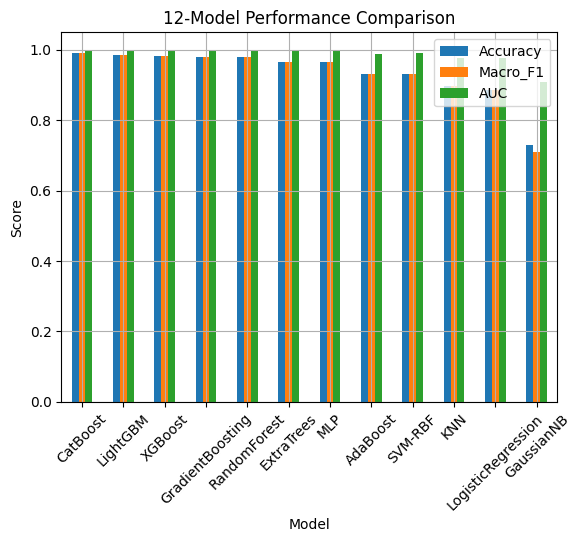


🔥 BEST MODEL: CatBoost
Model       CatBoost
Accuracy    0.990566
Macro_F1    0.990554
AUC         0.999527
Name: 0, dtype: object


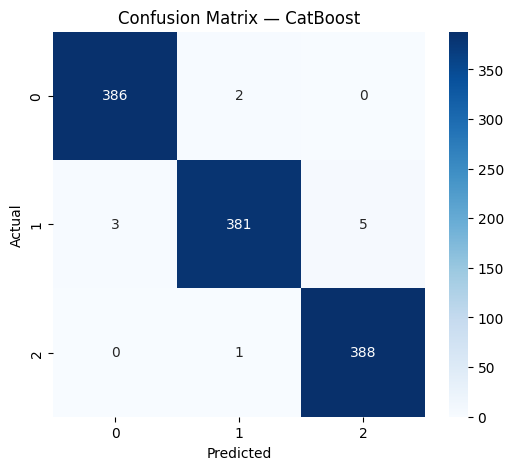

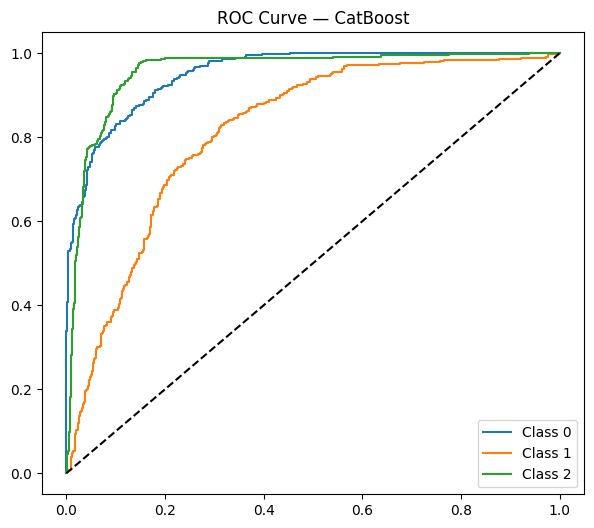

In [ ]:
# --------------------------------------------------------------
# 0. IMPORTS
# --------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve
)

from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, GradientBoostingClassifier
)
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE


# --------------------------------------------------------------
# 1. LOAD DATASET
# --------------------------------------------------------------
df = pd.read_csv("dataset_balanced_risk_final.csv")
print("Dataset Loaded:", df.shape)


# --------------------------------------------------------------
# 2. FEATURE SELECTION (DOMAIN-VALIDATED)
# --------------------------------------------------------------
selected_features = [
    # Terrain (DEM)
    "dem_slope", "dem_elevation", "dem_aspect",

    # Drone Imagery
    "crack_density", "debris_entropy", "debris_contrast",
    "debris_homogeneity", "vegetation_green_ratio",

    # Geotechnical Sensors
    "Displacement_mm", "Strain_micro",
    "PorePressure_kPa", "SeismicVibration_mm/s",

    # Rainfall Indicators
    "ANNUAL", "Jun-Sep", "Oct-Dec", "Mar-May",
    "SEP", "MAY", "OCT"
]

df = df[selected_features + ["rockfall_risk"]].fillna(0)


# --------------------------------------------------------------
# 3. CORRELATION ANALYSIS
# --------------------------------------------------------------
numeric_df = df.select_dtypes(include=["number"])
correlations = numeric_df.corr()["rockfall_risk"].sort_values(ascending=False)

print("\n🔍 TOP CORRELATED FEATURES\n")
print(correlations.head(15))

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - Rockfall Dataset")
plt.show()


# --------------------------------------------------------------
# 4. MUTUAL INFORMATION ANALYSIS
# --------------------------------------------------------------
X_mi = numeric_df.drop(columns=["rockfall_risk"])
y_mi = numeric_df["rockfall_risk"]

mi_scores = mutual_info_classif(X_mi, y_mi, random_state=42)
mi_df = pd.DataFrame({"Feature": X_mi.columns, "MI": mi_scores})
mi_df = mi_df.sort_values(by="MI", ascending=False)

print("\n🔍 Mutual Information Scores\n")
print(mi_df)


# --------------------------------------------------------------
# 5. TRAIN-TEST SPLIT + SMOTE
# --------------------------------------------------------------
X = df[selected_features]
y = df["rockfall_risk"]

print("\nInitial Class Distribution:\n", y.value_counts())

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

print("\nAfter SMOTE:\n", y_bal.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --------------------------------------------------------------
# 6. DEFINE 12 MODELS
# --------------------------------------------------------------
models = {
    "CatBoost": CatBoostClassifier(verbose=0, depth=8, learning_rate=0.05),
    "XGBoost": XGBClassifier(objective="multi:softprob", num_class=3, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier(objective="multiclass", num_class=3),
    "RandomForest": RandomForestClassifier(n_estimators=400),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=400),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=300),
    "MLP": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=800),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM-RBF": SVC(kernel="rbf", probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "GaussianNB": GaussianNB()
}


# --------------------------------------------------------------
# 7. TRAIN & EVALUATE MODELS
# --------------------------------------------------------------
results = []

for name, model in models.items():
    print(f"\n================ {name} =================")

    if name in ["MLP", "SVM-RBF", "KNN", "LogisticRegression"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        probas = model.predict_proba(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        probas = model.predict_proba(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = classification_report(y_test, preds, output_dict=True)["macro avg"]["f1-score"]
    auc = roc_auc_score(y_test, probas, multi_class="ovr")

    results.append([name, acc, f1, auc])

    print("Accuracy:", acc)
    print("Macro-F1:", f1)
    print("AUC:", auc)


# --------------------------------------------------------------
# 8. PERFORMANCE COMPARISON
# --------------------------------------------------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Macro_F1", "AUC"])
results_df = results_df.sort_values(by="Macro_F1", ascending=False)

print("\n📊 FINAL MODEL COMPARISON\n")
print(results_df)

plt.figure(figsize=(14,6))
results_df.set_index("Model")[["Accuracy","Macro_F1","AUC"]].plot(kind="bar")
plt.title("12-Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# --------------------------------------------------------------
# 9. BEST MODEL SELECTION
# --------------------------------------------------------------
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print("\n🔥 BEST MODEL:", best_model_name)
print(results_df.iloc[0])


# --------------------------------------------------------------
# 10. CONFUSION MATRIX (BEST MODEL)
# --------------------------------------------------------------
if best_model_name in ["MLP", "SVM-RBF", "KNN", "LogisticRegression"]:
    preds_best = best_model.predict(X_test_scaled)
else:
    preds_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, preds_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# --------------------------------------------------------------
# 11. ROC CURVE (BEST MODEL)
# --------------------------------------------------------------
plt.figure(figsize=(7,6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test == i, probas[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")

plt.plot([0,1],[0,1],'k--')
plt.title(f"ROC Curve — {best_model_name}")
plt.legend()
plt.show()


# --------------------------------------------------------------
# 12. SHAP EXPLAINABILITY (TREE MODELS)
# --------------------------------------------------------------
if best_model_name in ["CatBoost", "XGBoost", "LightGBM"]:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)
    shap.summary_plot(shap_values, X_train, plot_type="bar")


# --------------------------------------------------------------
# 13. SAVE FINAL MODEL
# --------------------------------------------------------------
joblib.dump(best_model, "final_best_rockfall_model_12_models.pkl")
print("\n✅ Model saved successfully")
